# Import the libraries

In [60]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import hvplot.pandas

import requests
import holoviews as hv
from bokeh.plotting import figure
from bokeh.plotting import figure, show
from bokeh.io import output_notebook


# Import API key
from api_keys import geoapify_key


# Define paths and read files

In [61]:
# Store filepath in a variable
file_one = Path("cleaned_files/merged_income_diet_final.csv")
file_two = Path("cleaned_files/obesity_final.csv")


In [62]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
Income_diet_df = pd.read_csv(file_one, encoding="ISO-8859-1")
obesity_df = pd.read_csv(file_two, encoding="ISO-8859-1")



In [63]:
#Display the Income Diet data frame
Income_diet_df.head()

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
0,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,3.21,3.66
1,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7007,Cost of starchy staples,PPP dollar per person per day,0.54,0.57
2,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7008,Cost of animal source foods,PPP dollar per person per day,0.97,1.00
3,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7009,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,0.39
4,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7010,Cost of vegetables,PPP dollar per person per day,0.43,0.58


In [64]:
# Create dataframe with only healthy diet rows , Item= Percentage of the population unable to afford ; Item Code = 7005
Income_unhealthy_diet_df = Income_diet_df.loc[Income_diet_df['Item Code'] == 7005, : ]
Income_unhealthy_diet_df.head()

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
7,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.40,8745.0,...,0.000000,Asia,Non-OECD,Upper middle income,1,7005,Percentage of the population unable to afford ...,%,49.3,54.1
16,Austria,2017.0,41.906,27.90,8.50,14.20,18.00,22.70,36.60,45378.0,...,1.057751,Europe,OECD,High income,11,7005,Percentage of the population unable to afford ...,%,2.5,3.4
25,Belarus,2017.0,21.866,25.44,9.93,14.24,17.87,22.47,35.50,17281.0,...,1.114978,Europe,Non-OECD,Upper middle income,57,7005,Percentage of the population unable to afford ...,%,3.2,1.0
34,Belgium,2017.0,2.039,26.00,9.10,14.10,18.60,23.30,34.90,42614.0,...,1.274799,Europe,OECD,High income,255,7005,Percentage of the population unable to afford ...,%,2.1,0.8
43,Bhutan,2017.0,59.833,37.44,6.68,10.79,15.46,22.70,44.38,9247.0,...,0.000000,Asia,Non-OECD,Lower middle income,18,7005,Percentage of the population unable to afford ...,%,28.9,21.5


In [65]:
#Get list of columns 
cols = Income_unhealthy_diet_df.columns
cols

Index(['country', 'year', 'rural_pop_pct', 'gini_reported', 'q1', 'q2', 'q3',
       'q4', 'q5', 'pop_gdp', 'population count', 'rural_pop', 'urban_pop',
       'staple_demand', 'region_un', 'oecd_member', 'incomegroup', 'Area Code',
       'Item Code', 'Item', 'Unit', 'Y2017', 'Y2021'],
      dtype='object')

In [66]:
# Note all Unit = PPP dollar per person per day; Item code  = 7004 ; Item = Cost of a healthy diet (PPP dollar per person
Income_unhealthy_diet_trimed_df =  Income_unhealthy_diet_df[['country',  'pop_gdp', 'population count', 'region_un', 'incomegroup',  'Y2017', 'Y2021']]
Income_unhealthy_diet_trimed_df.head()

,country,pop_gdp,population count,region_un,incomegroup,Y2017,Y2021
7,Armenia,8745.0,2944789.0,Asia,Upper middle income,49.3,54.1
16,Austria,45378.0,8819902.0,Europe,High income,2.5,3.4
25,Belarus,17281.0,9450233.0,Europe,Upper middle income,3.2,1.0
34,Belgium,42614.0,11419752.0,Europe,High income,2.1,0.8
43,Bhutan,9247.0,745563.0,Asia,Lower middle income,28.9,21.5


In [67]:
obesity_df.head()

,Impact per age group,Obesity Year,country,Region,Gender,Numeric,Lower Confidence Limit,Upper Confidence Limit
0,"Obesity, adults aged 18+",2022,Armenia,European Region,Total,24.509035,21.270099,27.916792
1,"Obesity, adults aged 18+",2022,Armenia,European Region,Males,18.979268,14.095305,24.546790
2,"Obesity, adults aged 18+",2022,Armenia,European Region,Females,27.979723,23.971364,32.053572
3,"Obesity, adults aged 18+",2022,Austria,European Region,Total,15.367542,12.667200,18.307179
4,"Obesity, adults aged 18+",2022,Austria,European Region,Males,18.450151,14.647363,22.728553


In [68]:
# Filter dataframe to keep only total obesity for  adults aged 18+
obesity_total_df =obesity_df.loc[obesity_df['Gender'] == 'Total', : ]
obesity_total_df.head()

,Impact per age group,Obesity Year,country,Region,Gender,Numeric,Lower Confidence Limit,Upper Confidence Limit
0,"Obesity, adults aged 18+",2022,Armenia,European Region,Total,24.509035,21.270099,27.916792
3,"Obesity, adults aged 18+",2022,Austria,European Region,Total,15.367542,12.667200,18.307179
6,"Obesity, adults aged 18+",2022,Belarus,European Region,Total,21.374618,19.208995,23.591891
9,"Obesity, adults aged 18+",2022,Belgium,European Region,Total,20.025368,17.123592,23.160708
12,"Obesity, adults aged 18+",2022,Bhutan,South-East Asia Region,Total,12.177311,10.242364,14.237449


In [69]:
# Get list of columns in obesity_total_df
col_list = obesity_total_df.columns
col_list

Index(['Impact per age group', 'Obesity Year', 'country', 'Region', 'Gender',
       'Numeric', 'Lower Confidence Limit', 'Upper Confidence Limit'],
      dtype='object')

In [70]:
# Keep only desired columns (drop others)
desired_cols = [ 'country', 'Numeric']
obesity_trimed_df = obesity_total_df[desired_cols] 
obesity_trimed_df.head()

,country,Numeric
0,Armenia,24.509035
3,Austria,15.367542
6,Belarus,21.374618
9,Belgium,20.025368
12,Bhutan,12.177311


In [71]:
# Rename columns
obesity_final_df = obesity_trimed_df.rename(columns= { "Numeric" : "% pop obese"})
obesity_final_df.head()
                                                      

,country,% pop obese
0,Armenia,24.509035
3,Austria,15.367542
6,Belarus,21.374618
9,Belgium,20.025368
12,Bhutan,12.177311


In [72]:
# Merge the income_unheatthy_diet and obesity dataframes

income_unhealthy_diet_obesity_df = pd.merge(Income_unhealthy_diet_trimed_df,obesity_final_df, on='country',how = 'inner')
income_unhealthy_diet_obesity_df.head()


,country,pop_gdp,population count,region_un,incomegroup,Y2017,Y2021,% pop obese
0,Armenia,8745.0,2944789.0,Asia,Upper middle income,49.3,54.1,24.509035
1,Austria,45378.0,8819902.0,Europe,High income,2.5,3.4,15.367542
2,Belarus,17281.0,9450233.0,Europe,Upper middle income,3.2,1.0,21.374618
3,Belgium,42614.0,11419752.0,Europe,High income,2.1,0.8,20.025368
4,Bhutan,9247.0,745563.0,Asia,Lower middle income,28.9,21.5,12.177311


In [73]:
# Get a count of all column rows to check for null entries
income_unhealthy_diet_obesity_df.count()

country             58
pop_gdp             57
population count    58
region_un           58
incomegroup         58
Y2017               58
Y2021               58
% pop obese         58
dtype: int64

# Remove rows with Null values

In [74]:
# Drop rows with NaN values
income_unhealthy_diet_obesity_df = income_unhealthy_diet_obesity_df.dropna()
income_unhealthy_diet_obesity_df.count()

country             57
pop_gdp             57
population count    57
region_un           57
incomegroup         57
Y2017               57
Y2021               57
% pop obese         57
dtype: int64

# Scatter plot for % of Population with unhealty diet vs.  Population gdp

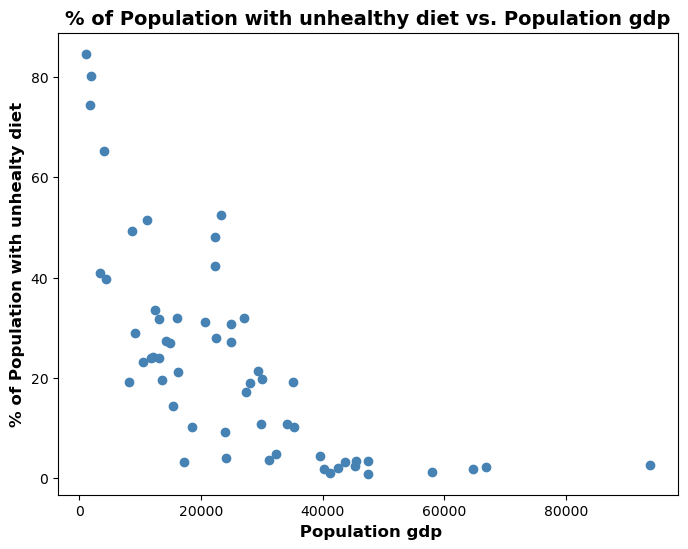

In [75]:
# Build scatter plot for % of Population with unhealty diet vs.  Population gdp
# YOUR CODE HERE
# Create the scatter plot
x = income_unhealthy_diet_obesity_df['pop_gdp']
y = income_unhealthy_diet_obesity_df['Y2017']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')

# Incorporate the other graph properties
# YOUR CODE HERE
# Add labels and title
plt.title('% of Population with unhealthy diet vs. Population gdp', fontsize=14, fontweight='bold')
plt.xlabel(' Population gdp', fontsize=12, fontweight='bold')
plt.ylabel('% of Population with unhealty diet', fontsize=12, fontweight='bold')

# Save the figure
plt.savefig("Output/Fig1.png")

# Show plot
plt.show()

# Scatter plot for % of Population Obese vs. % Population with unhealty diet

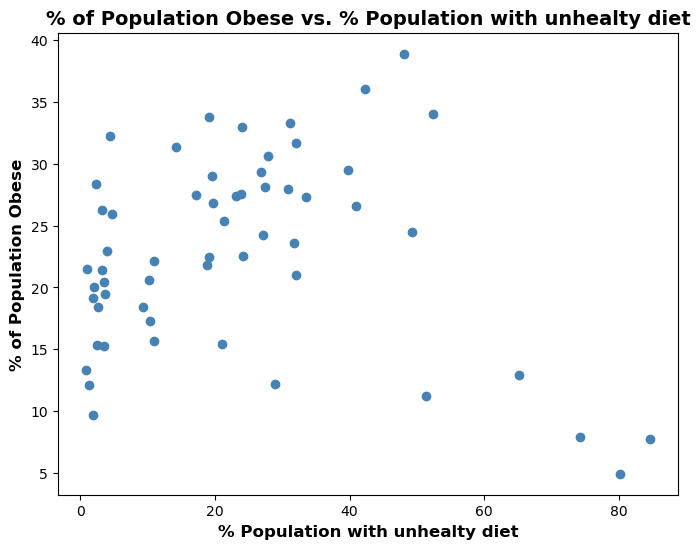

In [76]:
# Build scatter plot for % of Population Obese vs. % Population with unhealty diet
# YOUR CODE HERE
# Create the scatter plot
x = income_unhealthy_diet_obesity_df['Y2017']
y = income_unhealthy_diet_obesity_df['% pop obese']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')

# Incorporate the other graph properties
# YOUR CODE HERE
# Add labels and title
plt.title('% of Population Obese vs. % Population with unhealty diet', fontsize=14, fontweight='bold')
plt.xlabel('% Population with unhealty diet', fontsize=12, fontweight='bold')
plt.ylabel('% of Population Obese', fontsize=12, fontweight='bold')

# Save the figure
plt.savefig("Output/Fig2.png")

# Show plot
plt.show()

# Scatter plot for % of Population Obese vs.  Population gdp

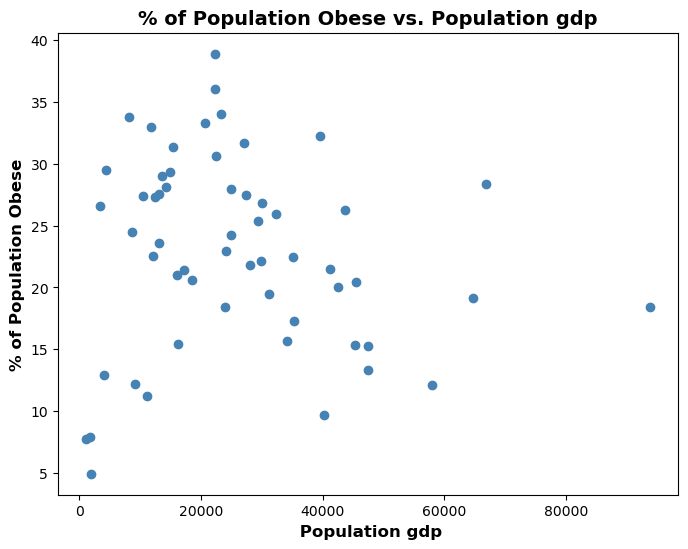

In [77]:
# Build scatter plot for % of Population Obese vs.  Population gdp
# YOUR CODE HERE
# Create the scatter plot
x = income_unhealthy_diet_obesity_df['pop_gdp']
y = income_unhealthy_diet_obesity_df['% pop obese']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')

# Incorporate the other graph properties
# YOUR CODE HERE
# Add labels and title
plt.title('% of Population Obese vs. Population gdp', fontsize=14, fontweight='bold')
plt.xlabel(' Population gdp', fontsize=12, fontweight='bold')
plt.ylabel('% of Population Obese', fontsize=12, fontweight='bold')


# Save the figure
plt.savefig("Output/Fig3.png")
# Show plot
plt.show()

# Define a function to create Linear Regression plots

In [101]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x,y, title, x_label,y_label,filepath):
    #Calculate the correlation 
    #correlation = y.corr(x)
    #print(f"The correlation between {x} and {y} is : {round(correlation,2)}")


    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    print(f"The r^2 - value is : {r_value**2}")
    # Plot the data points and the linear regression model
    plt.figure(figsize=(8, 6))
    plt.scatter(x , y, color='steelblue', label='Data Points')
    plt.plot(x, intercept + slope * x, 'r-', label='Fitted Line')

    # Add labels and title
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12, fontweight='bold')
    plt.ylabel(y_label, fontsize=12, fontweight='bold')

    # Format the equation string: y = mx + b
    equation_text = f'(The r^2 - value = {r_value**2:.4f}) |line equation ---> y = {slope:.5f}x + {intercept:.2f}'
    
    # Display the equation on the plot
    #plt.text(min(x), min(y)-10, equation_text, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))
    plt.annotate(equation_text, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12, color='red')

    # Save the figure
    plt.savefig(filepath)

    # Show the plot
    plt.show()

# % of Population with unhealty diet vs.  Population gdp Regression plot

The r^2 - value is : 0.4808008340064871


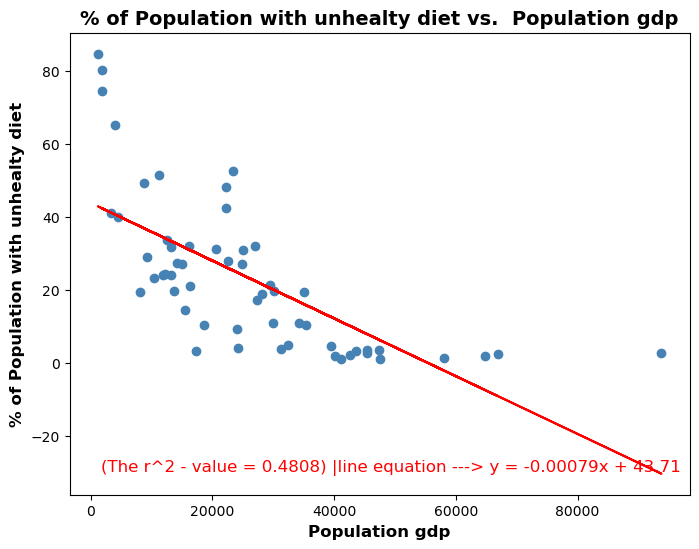

In [102]:
# % of Population with unhealty diet vs.  Population gdp regression plot
x = income_unhealthy_diet_obesity_df['pop_gdp']
y = income_unhealthy_diet_obesity_df['Y2017']

# Perform linear regression

title = "% of Population with unhealty diet vs.  Population gdp"
x_label = "Population gdp"
y_label = "% of Population with unhealty diet"
filepath = "Output/unhealthydiet_vs_popgdp.png"
plot_linear_regression(x,y, title, x_label,y_label,filepath)

# % of Population Obese vs. % Population with unhealty diet

The r^2 - value is : 0.009332261172024278


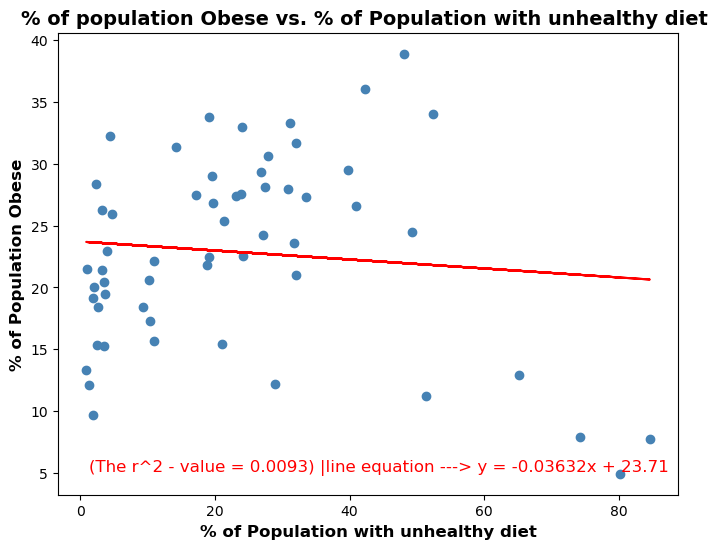

In [103]:
# % of Population Obese vs. % Population with unhealty diet

# % of Population with unhealty diet vs.  Population gdp regression plot
x = income_unhealthy_diet_obesity_df['Y2017']
y = income_unhealthy_diet_obesity_df['% pop obese']

# Perform linear regression

title = "% of population Obese vs. % of Population with unhealthy diet "
x_label = "% of Population with unhealthy diet"
y_label = "% of Population Obese"
filepath = "Output/pop_obese_vs_unhealthydiet.png"
plot_linear_regression(x,y, title, x_label,y_label,filepath)

#  % of Population Obese vs.  Population gdp Regression plot

The r^2 - value is : 0.008193623978516579


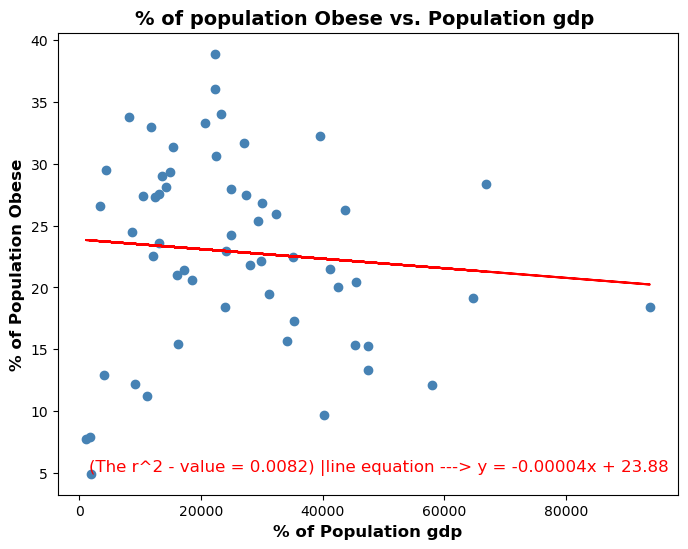

In [104]:
#  % of Population Obese vs.  Population gdp Regression plot
# YOUR CODE HERE
# Create the scatter plot
x = income_unhealthy_diet_obesity_df['pop_gdp']
y = income_unhealthy_diet_obesity_df['% pop obese']

# Perform linear regression

title = "% of population Obese vs. Population gdp "
x_label = "% of Population gdp"
y_label = "% of Population Obese"
filepath = "Output/pop_obese_vs_popgdp.png"
plot_linear_regression(x,y, title, x_label,y_label,filepath)

# Analysis

Based on the R^2 value of 0.48, we can conclude that there is a strong correllation between "% of Population with unhealty diet" vs.  Population gdp .

The result  for "% of population Obese" vs. "% of Population with unhealty diet" does not show strong correlation ( 0.009)

Moreover, the resulst for "% of population Obese" vs. " Population gdp" also show no strong correlation (0.008)

#  Part 2. Get geo cordinates of countries for visualising the spread of unhealty eating around the globe.

In [82]:
# Get the columns of income_unhealty_diet_obesity_df

col_list = income_unhealthy_diet_obesity_df.columns
col_list

Index(['country', 'pop_gdp', 'population count', 'region_un', 'incomegroup',
       'Y2017', 'Y2021', '% pop obese'],
      dtype='object')

In [83]:
# Create a new Dataframe called income_unhealthydiet_obesity_df. 
# Add the Lat and Lng columns in the income_unhealty_diet_obesity_df

income_diet_obesity_df = income_unhealthy_diet_obesity_df[['country', 'pop_gdp', 'incomegroup',
       'Y2017', '% pop obese']].copy()
income_diet_obesity_df['City'] = ""
income_diet_obesity_df['Lat'] = 0.0
income_diet_obesity_df['Lng'] = 0.0
income_diet_obesity_df.head()


,country,pop_gdp,incomegroup,Y2017,% pop obese,City,Lat,Lng
0,Armenia,8745.0,Upper middle income,49.3,24.509035,,0.0,0.0
1,Austria,45378.0,High income,2.5,15.367542,,0.0,0.0
2,Belarus,17281.0,Upper middle income,3.2,21.374618,,0.0,0.0
3,Belgium,42614.0,High income,2.1,20.025368,,0.0,0.0
4,Bhutan,9247.0,Lower middle income,28.9,12.177311,,0.0,0.0


In [84]:
# Iterate through the hotel_df DataFrame
for index, row in income_diet_obesity_df.iterrows():
    # get country from the DataFrame
    # YOUR CODE HERE
    country =  income_diet_obesity_df.loc[index,"country"]
    # if city:
    #     # If a city is provided, search for city + country
    #     query = f"{city},{country}"
    # else:
    #     # If no city is provided, search by country only
    #     query = country
    
    # Geoapify API request URL
    url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={geoapify_key}"

   
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
         # Send GET request to the Geoapify API
        response = requests.get(url)
        # Parse the response JSON
        data = response.json()
        # Get the first result's coordinates (lat, lon)
        #city = data['features'][0]['properties']['city']
        latitude = data['features'][0]['properties']['lat']
        longitude = data['features'][0]['properties']['lon']
        

    except (KeyError, IndexError):
        print(" No coordinates found")
        

    # Log the search results
    #income_diet_obesity_df.loc[index,"City"] = city
    income_diet_obesity_df.loc[index,"Lat"] = latitude
    income_diet_obesity_df.loc[index,"Lng"] = longitude
# Display sample data
income_diet_obesity_df.head()

,country,pop_gdp,incomegroup,Y2017,% pop obese,City,Lat,Lng
0,Armenia,8745.0,Upper middle income,49.3,24.509035,,4.536307,-75.672375
1,Austria,45378.0,High income,2.5,15.367542,,47.593970,14.124560
2,Belarus,17281.0,Upper middle income,3.2,21.374618,,53.425061,27.697136
3,Belgium,42614.0,High income,2.1,20.025368,,50.640281,4.666715
4,Bhutan,9247.0,Lower middle income,28.9,12.177311,,27.549511,90.511927


In [85]:
income_diet_obesity_df.head()

,country,pop_gdp,incomegroup,Y2017,% pop obese,City,Lat,Lng
0,Armenia,8745.0,Upper middle income,49.3,24.509035,,4.536307,-75.672375
1,Austria,45378.0,High income,2.5,15.367542,,47.593970,14.124560
2,Belarus,17281.0,Upper middle income,3.2,21.374618,,53.425061,27.697136
3,Belgium,42614.0,High income,2.1,20.025368,,50.640281,4.666715
4,Bhutan,9247.0,Lower middle income,28.9,12.177311,,27.549511,90.511927


In [108]:
# Plot obesity spread on map
#%%capture --no-display
%matplotlib inline
# Configure the map plot
# YOUR CODE HERE
map_plot_1 = income_diet_obesity_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "% pop obese",
    scale = 2,
    color = "country",
    hover_cols= ["pop_gdp", "incomegroup","country"]

)

# Display the map
# YOUR CODE HERE
# Save the plot
hv.save(map_plot_1, 'obesity_map.png', fmt='png')  # Save as PNG
map_plot_1


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (country,% pop obese,pop_gdp,incomegroup)

# Saving the final dataframes as CSVs

In [87]:
# Export file as a CSV, without the Pandas index, but with the header
#new_obesity_18plus_df.to_csv("Output/obesity_final.csv", index=False, header=True)
#income_coahd_df.to_csv("Output/merged_income_diet_final.csv", index=False, header=True)